### Daily Gym Attendance and Workout Analysis

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
try:
    gym = pd.read_csv('daily_gym_attendance_workout_data.csv', sep=None, engine='python')
    
    if isinstance(gym, pd.Series):
        gym = gym.to_frame()
    print(gym.columns.tolist())
except Exception as e:
    print(f"Error: {e}")

['member_id', 'visit_date', 'age', 'gender', 'membership_type', 'workout_type', 'workout_duration_minutes', 'calories_burned', 'check_in_time', 'attendance_status']


In [18]:
print(f"Type: {type(gym)}")
print(f"{gym.shape}")
gym.head() 

Type: <class 'pandas.DataFrame'>
(2600, 10)


,member_id,visit_date,age,gender,membership_type,workout_type,workout_duration_minutes,calories_burned,check_in_time,attendance_status
0,1,2024-10-11,64,Other,Annual,HIIT,28,171,20:04,Absent
1,2,2024-06-01,65,Female,Quarterly,Strength Training,72,650,19:17,Absent
2,3,2024-06-13,45,Male,Quarterly,Cardio,70,633,7:24,Absent
3,4,2024-02-05,35,Female,Monthly,CrossFit,64,362,7:18,Absent
4,5,2024-07-13,26,Female,Quarterly,Yoga,31,262,11:22,Absent


In [19]:
gym = gym.drop_duplicates()
reporte_asistencia = pd.crosstab(gym['membership_type'], 
                                 gym['attendance_status'], 
                                 normalize='index') * 100
print(reporte_asistencia.round(2))

attendance_status  Absent  Present
membership_type                   
Annual              51.27    48.73
Monthly             50.70    49.30
Quarterly           53.86    46.14


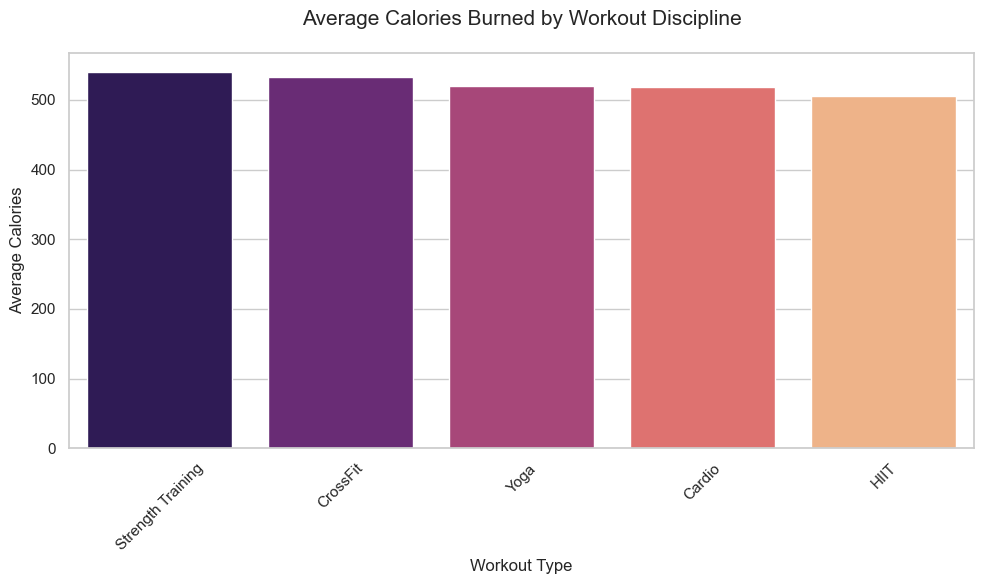

Exact values per category:
workout_type
Strength Training    540.626118
CrossFit             532.453831
Yoga                 519.603854
Cardio               519.152294
HIIT                 505.757692
Name: calories_burned, dtype: float64


In [26]:
avg_calories_per_workout = gym.groupby('workout_type')['calories_burned'].mean().sort_values(ascending=False)

# 2. Ahora configuramos y mostramos la gráfica
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))

sns.barplot(
    x=avg_calories_per_workout.index, 
    y=avg_calories_per_workout.values, 
    hue=avg_calories_per_workout.index, 
    palette='magma', 
    legend=False 
)

plt.title('Average Calories Burned by Workout Discipline', fontsize=15, pad=20)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Average Calories', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Imprimimos los valores exactos abajo para referencia
print("Exact values per category:")
print(avg_calories_per_workout)

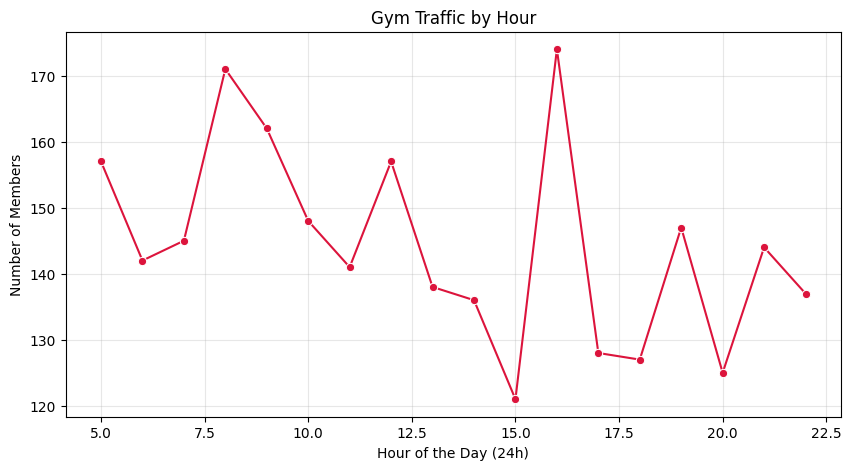

In [21]:
# Create the hour column
gym['hour'] = pd.to_datetime(gym['check_in_time'], format='%H:%M').dt.hour

# Count visits per hour
hourly_traffic = gym['hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values, marker='o', color='crimson')
plt.title('Gym Traffic by Hour')
plt.xlabel('Hour of the Day (24h)')
plt.ylabel('Number of Members')
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
# Create age groups
bins = [18, 30, 45, 60, 100]
labels = ['18-29', '30-44', '45-59', '60+']
gym['age_group'] = pd.cut(gym['age'], bins=bins, labels=labels, right=False)

# Analyze which age group spends more time in the gym
age_analysis = gym.groupby('age_group')['workout_duration_minutes'].mean()
print(age_analysis)

age_group
18-29    70.390244
30-44    69.995098
45-59    70.214896
60+      70.031429
Name: workout_duration_minutes, dtype: float64


In [23]:
# Create age groups
bins = [18, 30, 45, 60, 100]
labels = ['18-29', '30-44', '45-59', '60+']
gym['age_group'] = pd.cut(gym['age'], bins=bins, labels=labels, right=False)

# Analyze which age group spends more time in the gym
age_analysis = gym.groupby('age_group')['workout_duration_minutes'].mean()
print(age_analysis)

age_group
18-29    70.390244
30-44    69.995098
45-59    70.214896
60+      70.031429
Name: workout_duration_minutes, dtype: float64


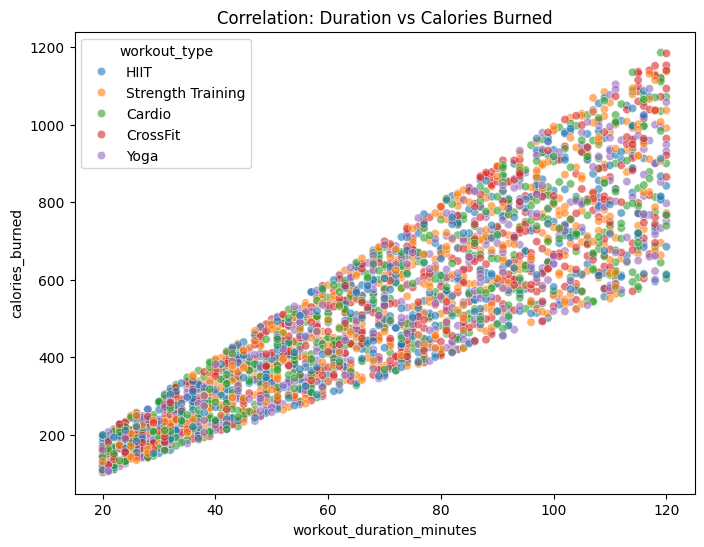

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=gym, x='workout_duration_minutes', y='calories_burned', hue='workout_type', alpha=0.6)
plt.title('Correlation: Duration vs Calories Burned')
plt.show()

Through this data analysis, we identified that Monthly members are our most loyal attendees. We also found a peak in gym traffic at *Gym Traffic by Hour*, suggesting a need for more staff during those hours. Finally, Strength Training proved to be the most efficient workout for calorie burning, regardless of the member's age.